In [1]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits

In [2]:
exp02_1 = fits.open('/Users/sidneylower/Documents/ObsTech CCD/DF02_baseline.FIT')[0].data
exp1_1 = fits.open('/Users/sidneylower/Documents/ObsTech CCD/DF1_dc.FIT')[0].data
exp5_1 = fits.open('/Users/sidneylower/Documents/ObsTech CCD/DF5_dc.FIT')[0].data
exp5_2 = fits.open('/Users/sidneylower/Documents/ObsTech CCD/DF5_dc2.FIT')[0].data
exp25_1 = fits.open('/Users/sidneylower/Documents/ObsTech CCD/DF25_dc.FIT')[0].data
exp25_2 = fits.open('/Users/sidneylower/Documents/ObsTech CCD/DF25_dc2.FIT')[0].data
exp125_1 = fits.open('/Users/sidneylower/Documents/ObsTech CCD/DF125_dc.FIT')[0].data

In [3]:
exp02_1med = np.median(exp02_1, axis=1)
exp1_1med = np.median(exp1_1, axis=1)
exp5_1med = np.median(exp5_1, axis=1)
exp5_2med = np.median(exp5_2, axis=1)
exp25_1med = np.median(exp25_1, axis=1)
exp25_2med = np.median(exp25_2, axis=1)
exp125_1med = np.median(exp125_1, axis=1)

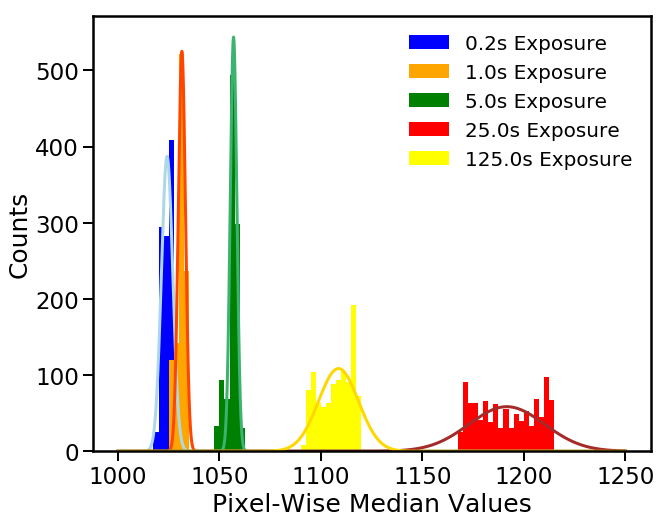

In [4]:
from scipy.optimize import curve_fit

plt.figure(figsize=(10,8))

plt.rcParams['xtick.labelsize'] = 23
plt.rcParams['ytick.labelsize'] = 23
plt.rcParams['axes.linewidth'] = 2.5
plt.tick_params('both', length=10, width=2, which='major')
plt.tick_params('both', length=4.5, width=2, which='minor')

bin_heights02, bin_borders02, _ = plt.hist(exp02_1med, 100, color='blue', range=(1000, 1250), label='0.2s Exposure')
bin_heights1, bin_borders1, _ = plt.hist(exp1_1med, 100, color='orange', range=(1000, 1250), label='1.0s Exposure')
bin_heights5, bin_borders5, _ = plt.hist(exp5_1med, 100, color='green', range=(1000, 1250), label='5.0s Exposure')
#plt.hist(exp5_2mean, 100, fill=False, edgecolor='mediumseagreen', range=(1000, 1250))
bin_heights25, bin_borders25, _ = plt.hist(exp25_1med, 100, color='red', range=(1000, 1250), label='25.0s Exposure')
#plt.hist(exp25_2mean, 100, fill=False, edgecolor='darkred', range=(1000, 1250))
bin_heights125, bin_borders125, _ = plt.hist(exp125_1med, 100, color='yellow', range=(1000, 1250), label='125.0s Exposure')



#fits to the histograms to get mean

def gaussian(x, mean, amplitude, standard_deviation):
    return amplitude * np.exp( - ((x - mean) / standard_deviation) ** 2)

bin_centers02 = bin_borders02[:-1] + np.diff(bin_borders02) / 2
bin_centers1 = bin_borders1[:-1] + np.diff(bin_borders1) / 2
bin_centers5 = bin_borders5[:-1] + np.diff(bin_borders5) / 2
bin_centers25 = bin_borders25[:-1] + np.diff(bin_borders25) / 2
bin_centers125 = bin_borders125[:-1] + np.diff(bin_borders125) / 2

popt02, _ = curve_fit(gaussian, bin_centers02, bin_heights02, p0=[1020, 400, 10.])
popt1, _ = curve_fit(gaussian, bin_centers1, bin_heights1, p0=[1030., 400, 10.])
popt5, _ = curve_fit(gaussian, bin_centers5, bin_heights5, p0=[1050., 400, 10.])
popt25, _ = curve_fit(gaussian, bin_centers25, bin_heights25, p0=[1180., 90, 50.])
popt125, _ = curve_fit(gaussian, bin_centers125, bin_heights125, p0=[1100., 150., 50.])

x_interval_for_fit02 = np.linspace(bin_borders02[0], bin_borders02[-1], 10000)
x_interval_for_fit1 = np.linspace(bin_borders1[0], bin_borders1[-1], 10000)
x_interval_for_fit5 = np.linspace(bin_borders5[0], bin_borders5[-1], 10000)
x_interval_for_fit25 = np.linspace(bin_borders25[0], bin_borders25[-1], 10000)
x_interval_for_fit125 = np.linspace(bin_borders125[0], bin_borders125[-1], 10000)


plt.plot(x_interval_for_fit02, gaussian(x_interval_for_fit02, *popt02), c='lightblue', lw=3)
plt.plot(x_interval_for_fit1, gaussian(x_interval_for_fit1, *popt1), c='orangered', lw=3)
plt.plot(x_interval_for_fit5, gaussian(x_interval_for_fit5, *popt5),c='mediumseagreen', lw=3)
plt.plot(x_interval_for_fit25, gaussian(x_interval_for_fit25, *popt25),c='brown', lw=3)
plt.plot(x_interval_for_fit125, gaussian(x_interval_for_fit125, *popt125),c='gold', lw=3)



plt.legend()


plt.xlabel('Pixel-Wise Median Values', fontsize=25)
plt.ylabel('Counts', fontsize=25)

plt.legend(loc='upper right', frameon=False, fontsize=20)

125 second exposure is dimmer than the 25 s exposure? Not sure what happened there. This will upset the trend for dDN/dt so we should discard it

In [5]:
fitmean02 = popt02[0]
fitsigma02 = popt02[2]

fitmean1 = popt1[0]
fitsigma1 = popt1[2]

fitmean5 = popt5[0]
fitsigma5 = popt5[2]

fitmean25 = popt25[0]
fitsigma25 = popt25[2]

fitmean125 = popt125[0]
fitsigma125 = popt125[2]

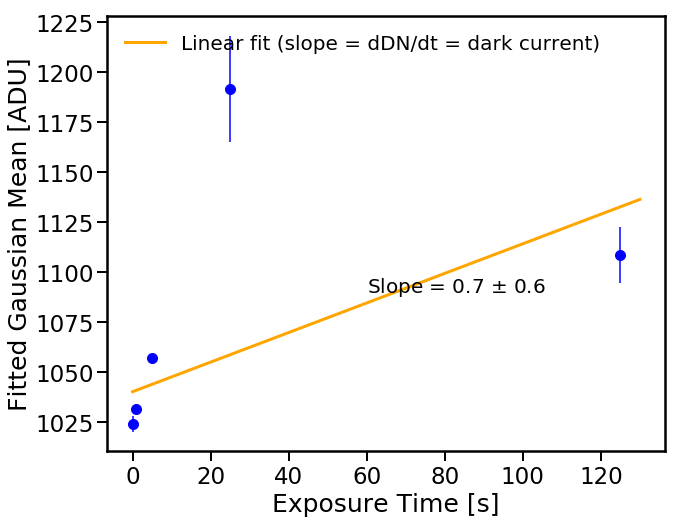

In [6]:
plt.figure(figsize=(10,8))

plt.rcParams['xtick.labelsize'] = 23
plt.rcParams['ytick.labelsize'] = 23
plt.rcParams['axes.linewidth'] = 2.5
plt.tick_params('both', length=10, width=2, which='major')
plt.tick_params('both', length=4.5, width=2, which='minor')

def linear_fit(x, m, b):
    return x*m + b

popt_lin, pcov_lin = curve_fit(f=linear_fit, xdata=[0.2, 1., 5., 25., 125.], ydata=[fitmean02, fitmean1, fitmean5, fitmean25, fitmean125], sigma = [fitsigma02, fitsigma1, fitsigma5, fitsigma25, fitsigma125],p0=[1.0, 1000.])



plt.scatter([0.2, 1., 5., 25., 125.], [fitmean02, fitmean1, fitmean5, fitmean25, fitmean125], color='blue', s=100)
plt.errorbar([0.2, 1., 5., 25., 125.], [fitmean02, fitmean1, fitmean5, fitmean25, fitmean125], yerr=[fitsigma02, fitsigma1, fitsigma5, fitsigma25, fitsigma125], ls='None',color='blue')


x = np.linspace(0, 130, 500)
plt.plot(x, linear_fit(x, *popt_lin), color='orange', lw=3, label='Linear fit (slope = dDN/dt = dark current)')

plt.xlabel('Exposure Time [s]', fontsize=25)
plt.ylabel('Fitted Gaussian Mean [ADU]', fontsize=25)

plt.annotate('Slope = 0.7 $\pm$ 0.6', xy=(60, 1090), fontsize=20)

plt.legend(loc='upper left', frameon=False, fontsize=20)

In [15]:

perr_slope = np.sqrt(np.diag(pcov_lin))[0]
print(popt_lin[0], perr_slope)

0.739558151311277 0.6229400344794632


Yeah so the 125s exposure severely screws up the distribution. As seen from the plot below, when it is discarded, the curve goes back to the expected linear fit to derive the slope = dDN/dt

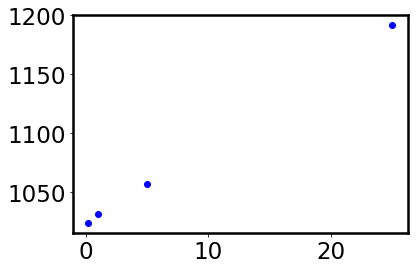

In [16]:
plt.scatter([0.2, 1., 5., 25.], [fitmean02, fitmean1, fitmean5, fitmean25], color='blue')

In [17]:
def linear_fit(x, m, b):
    return x*m + b

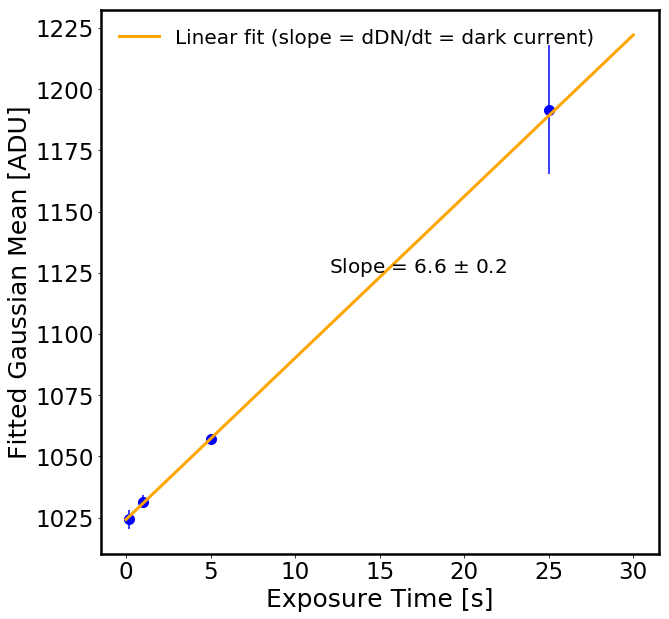

In [20]:

plt.figure(figsize=(10,10))
popt_lin, pcov_lin = curve_fit(f=linear_fit, xdata=[0.2, 1., 5., 25.], ydata=[fitmean02, fitmean1, fitmean5, fitmean25], sigma = [fitsigma02, fitsigma1, fitsigma5, fitsigma25],p0=[1.0, 1000.])



plt.scatter([0.2, 1., 5., 25.], [fitmean02, fitmean1, fitmean5, fitmean25], color='blue', s=100)
plt.errorbar([0.2, 1., 5., 25.], [fitmean02, fitmean1, fitmean5, fitmean25], yerr=[fitsigma02, fitsigma1, fitsigma5, fitsigma25], ls='None',color='blue')


x = np.linspace(0, 30, 200)
plt.plot(x, linear_fit(x, *popt_lin), color='orange', lw=3, label='Linear fit (slope = dDN/dt = dark current)')

plt.xlabel('Exposure Time [s]', fontsize=25)
plt.ylabel('Fitted Gaussian Mean [ADU]', fontsize=25)

plt.annotate('Slope = 6.6 $\pm$ 0.2', xy=(12, 1125), fontsize=20)

plt.legend(loc='upper left', frameon=False, fontsize=20)

In [ ]:
plt.figure(figsize=(10,10))
popt_lin, pcov_lin = curve_fit(f=linear_fit, xdata=[0.2, 1., 5., 25.], ydata=[fitmean02, fitmean1, fitmean5, fitmean25], sigma = [fitsigma02, fitsigma1, fitsigma5, fitsigma25],p0=[1.0, 1000.])



plt.scatter([0.2, 1., 5., 25.], [fitmean02, fitmean1, fitmean5, fitmean25], color='blue', s=100)
plt.errorbar([0.2, 1., 5., 25.], [fitmean02, fitmean1, fitmean5, fitmean25], yerr=[fitsigma02, fitsigma1, fitsigma5, fitsigma25], ls='None',color='blue')


x = np.linspace(0, 30, 200)
plt.plot(x, linear_fit(x, *popt_lin), color='orange', lw=3, label='Linear fit (slope = dDN/dt = dark current)')

plt.xlabel('Exposure Time [s]', fontsize=25)
plt.ylabel('Fitted Gaussian Mean [ADU]', fontsize=25)

plt.annotate('Slope = 6.6 $\pm$ 0.2', xy=(12, 1125), fontsize=20)

plt.legend(loc='upper left', frameon=False, fontsize=20)

In [36]:
popt_lin[0], pcov_lin[0]

(6.598618872150882, array([ 0.04053898, -0.11274711]))

In [100]:
popt_lin

array([   6.59861887, 1024.18594882])

In [103]:
pcov_lin

array([[ 0.04053898, -0.11274711],
       [-0.11274711,  0.56559878]])

In [107]:
perr_slope = np.sqrt(np.diag(pcov_lin))[0]

In [109]:
perr_slope

0.20134294833884753